In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')

In [4]:
time = pd.read_csv("traffic.csv",
                   parse_dates=['Period'], index_col='Period',
                   date_parser=dateparse)
time.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [5]:
time.max()

Total    102282464
dtype: int64

In [6]:
time1 = time['Total']
time1.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

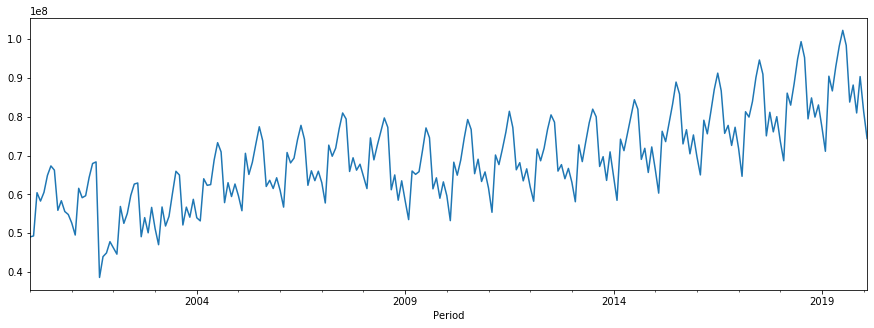

In [7]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

In [8]:
time.shape

(242, 1)

In [9]:
train=time1[0:216] 
test=time1[216:]

In [10]:
train

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
                ...   
2017-08-01    90980861
2017-09-01    75092288
2017-10-01    81168038
2017-11-01    76124199
2017-12-01    80037670
Name: Total, Length: 216, dtype: int64

In [11]:
test

Period
2018-01-01     73795632
2018-02-01     68674042
2018-03-01     86103036
2018-04-01     83009398
2018-05-01     88525057
2018-06-01     94917274
2018-07-01     99373375
2018-08-01     95268223
2018-09-01     79470508
2018-10-01     84870973
2018-11-01     79928178
2018-12-01     83057947
2019-01-01     77332661
2019-02-01     71115092
2019-03-01     90468975
2019-04-01     86675353
2019-05-01     92967337
2019-06-01     98264448
2019-07-01    102282464
2019-08-01     98398085
2019-09-01     83798763
2019-10-01     88191029
2019-11-01     80993438
2019-12-01     90371414
2020-01-01     81512274
2020-02-01     74408177
Name: Total, dtype: int64

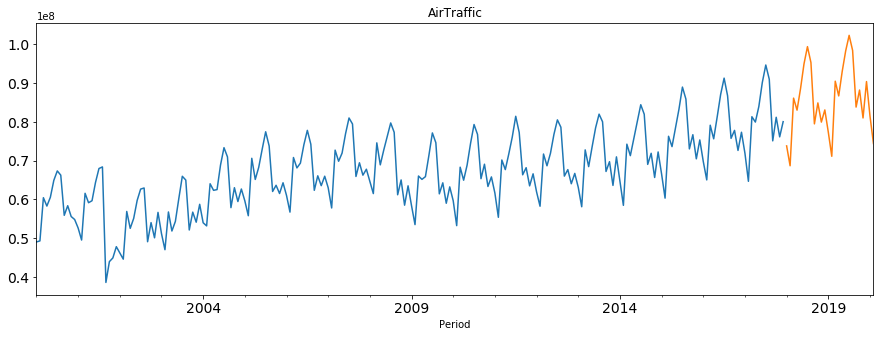

In [12]:
train.plot(figsize=(15,5), title= 'AirTraffic', fontsize=14)
test.plot(figsize=(15,5), title= 'AirTraffic', fontsize=14)
plt.show()

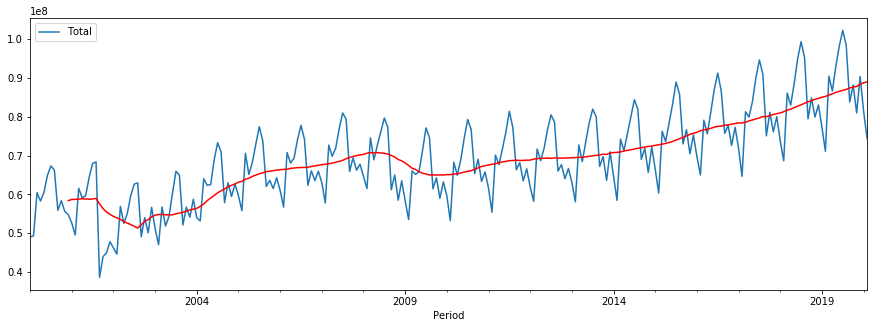

In [13]:
moving_avg =time1.rolling(12).mean()
time.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

C:\Users\vikesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


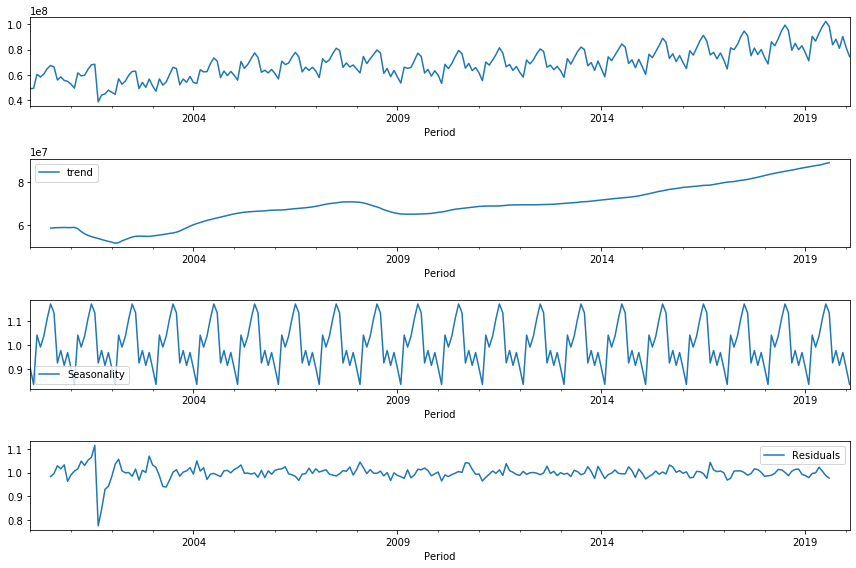

In [14]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(12,8),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(12,8),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(12,8),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(12,8),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\vikesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


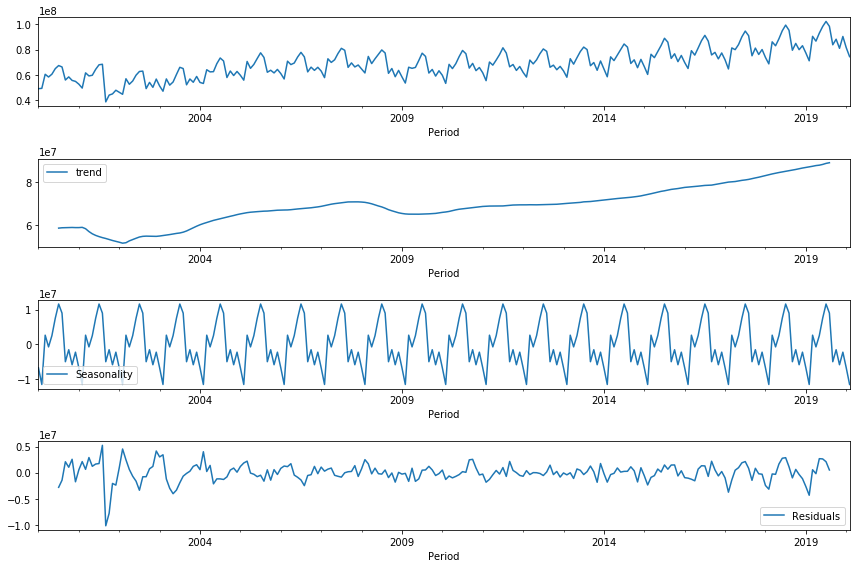

In [15]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(12,8),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(12,8),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(12,8),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(12,8),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [17]:
import statsmodels.tsa.api

# SimpleExpSmoothing

In [18]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(26)
ses.summary()

C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Total,No. Observations:,216
Model:,SimpleExpSmoothing,SSE,9422364075437820.000
Optimized:,True,AIC,6787.822
Trend:,None,BIC,6794.573
Seasonal:,None,AICC,6788.012
Seasonal Periods:,None,Date:,"Thu, 18 Feb 2021"
Box-Cox:,False,Time:,15:04:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7187209,alpha,True
initial_level,4.9045e+07,l.0,True


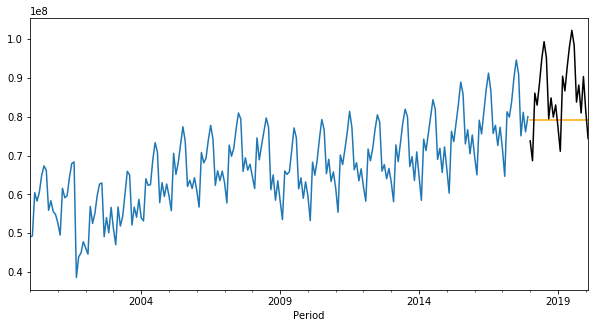

In [19]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

### MAE and RMSE

In [20]:
print(mean_absolute_error(y_true=test,y_pred=ses1))

9010315.612280177


In [22]:
print(mean_squared_error(test, ses1, squared=False))

11055004.5524612


# Holt’s ExponentialSmoothing

In [23]:
hes = ExponentialSmoothing(train, trend='mul').fit()
hes.summary()

C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Total,No. Observations:,216
Model:,ExponentialSmoothing,SSE,9488207468076480.000
Optimized:,True,AIC,6793.326
Trend:,Multiplicative,BIC,6806.827
Seasonal:,None,AICC,6793.728
Seasonal Periods:,None,Date:,"Thu, 18 Feb 2021"
Box-Cox:,False,Time:,15:05:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7121429,alpha,True
smoothing_trend,0.0001,beta,True


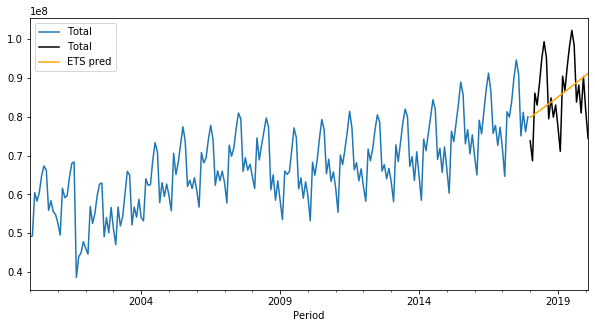

In [25]:
hes1 = hes.forecast(26)
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

### MAE and RMSE

In [26]:
print(mean_absolute_error(y_true=test,y_pred=hes1))

7465646.340532457


In [28]:
print(mean_squared_error(test, hes1, squared=False))

9022794.54589364


# Holt winter ExponentialSmoothing

In [29]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="multiplicative").fit()
hwes.summary()

C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Total,No. Observations:,216
Model:,ExponentialSmoothing,SSE,862079713025935.750
Optimized:,True,AIC,6299.260
Trend:,Additive,BIC,6353.264
Seasonal:,Multiplicative,AICC,6302.732
Seasonal Periods:,12,Date:,"Thu, 18 Feb 2021"
Box-Cox:,False,Time:,15:06:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,True
smoothing_trend,0.0250000,beta,True


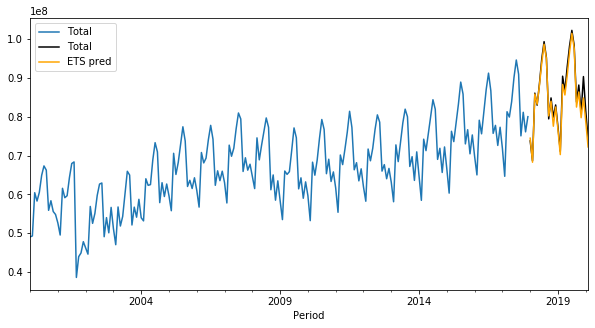

In [30]:
hwes1 = hwes.forecast(26)
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

### MAE and RMSE

In [31]:
print(mean_absolute_error(y_true=test,y_pred=hwes1))

1276343.5107224223


In [32]:
print(mean_squared_error(test, hwes1, squared=False))

1690485.5529335611


# ARIMA

### Series needs to be stationary(No trend and no seasonality)

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

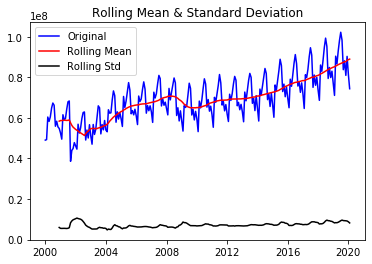

Results of Dickey-Fuller Test:
Test Statistic                  -5.131285
p-value                          0.000012
#Lags Used                       0.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [34]:
test_stationarity(time1)

### pvalue > 0.05 hence H0 accepted that the series is nonstationary

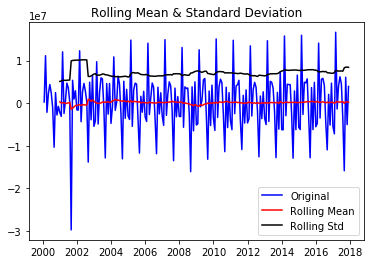

Results of Dickey-Fuller Test:
Test Statistic                  -3.746833
p-value                          0.003501
#Lags Used                      12.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


In [35]:
diff1=train.diff()
diff1=diff1.dropna()
test_stationarity(diff1)

### pvalue < 0.05 hence H1 accepted that the series is stationary

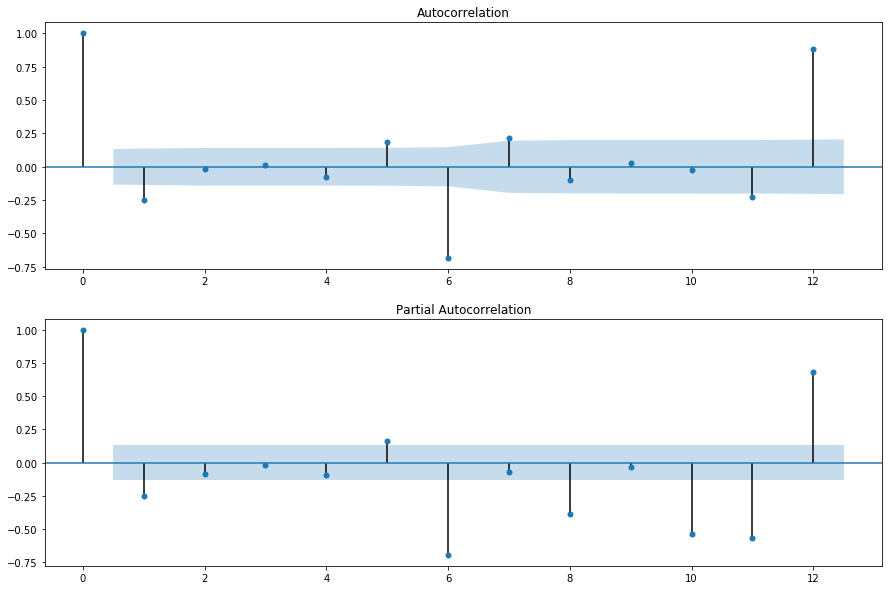

In [36]:
from statsmodels.tsa.stattools import acf, pacf
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

### ARIMA

In [37]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3666.164
Method:                       css-mle   S.D. of innovations        6130657.567
Date:                Thu, 18 Feb 2021   AIC                           7340.328
Time:                        15:07:08   BIC                           7353.810
Sample:                    02-01-2000   HQIC                          7345.775
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.442e+05        nan        nan        nan         nan         nan
ar.L1.D.Total     0.5617      0.056      9.986      0.000       0.451       0.672
ma.L1.D.Total    -0.9748        nan     

C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS 

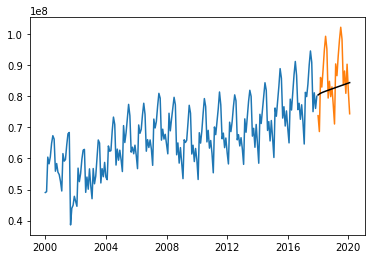

In [38]:
forecast = model_fit.forecast(steps=26)[0]
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

### MAE and RMSE

In [39]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

7639774.648329021


In [41]:
print(mean_squared_error(test, forecast, squared=False))

9339417.996687554


# AUTO ARIMA

In [42]:
import pmdarima as pm

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6554.326, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6551.933, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6550.822, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6555.591, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6540.705, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6551.814, Time=0.21 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=6541.887, Time=2.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=6542.061, Time=2.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6545.896, Time=1.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6551.147, Time=0.75 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=6544.695, Time=1.67 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=6659.501, Time=0.42 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=6541.735, Time=0.89 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=6553.039, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1

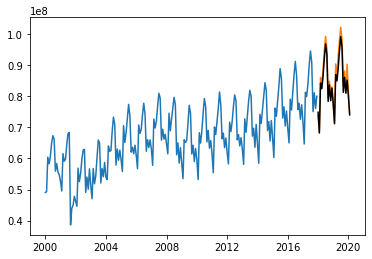

In [43]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=3, max_Q=3, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [44]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  216
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3266.352
Date:                            Thu, 18 Feb 2021   AIC                           6540.705
Time:                                    15:08:12   BIC                           6553.958
Sample:                                         0   HQIC                          6546.066
                                            - 216                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0713      0.021     -3.382      0.001      -0.113      -0.030
ar.S.L12       0.5556      0.063   

### MAE and RMSE

In [45]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

1794060.236820802


In [46]:
print(mean_squared_error(test, forecast, squared=False))

2199534.7867948688


# SARIMA

In [47]:
import statsmodels.api as sm

In [48]:
diffs1=train.diff(12)
diffs1=diffs1.dropna()

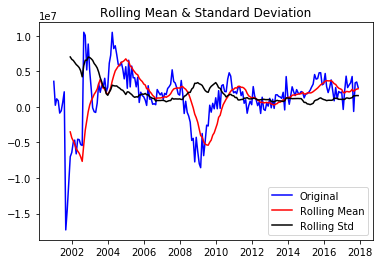

Results of Dickey-Fuller Test:
Test Statistic                  -3.229044
p-value                          0.018364
#Lags Used                      14.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


In [49]:
test_stationarity(diffs1)

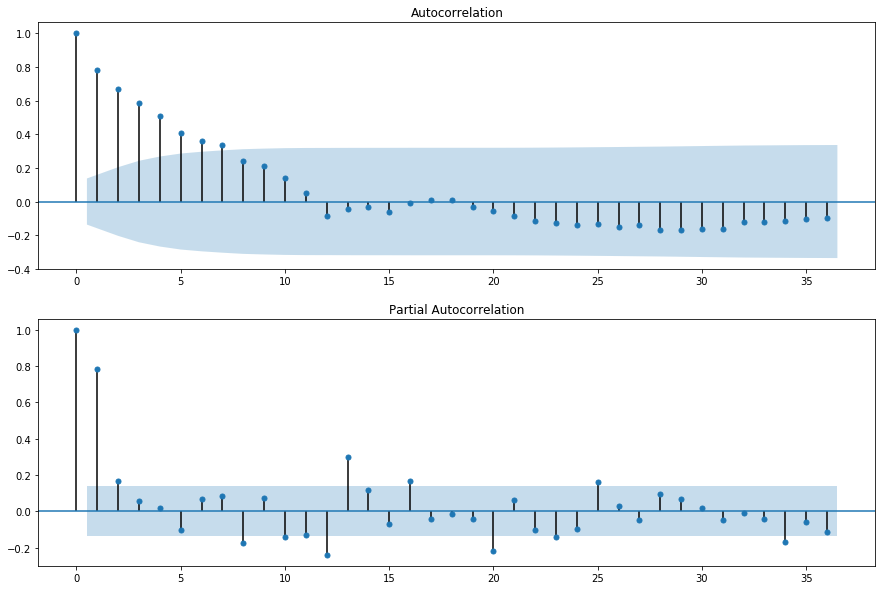

In [50]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=36)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=36)
pyplot.show()

In [51]:
train.shape

(216,)

In [52]:
model = sm.tsa.SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,1,12))

C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vikesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  216
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3266.352
Date:                            Thu, 18 Feb 2021   AIC                           6540.705
Time:                                    15:09:46   BIC                           6553.958
Sample:                                01-01-2000   HQIC                          6546.066
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0713      0.021     -3.382      0.001      -0.113      -0.030
ar.S.L12       0.5556      0.063   

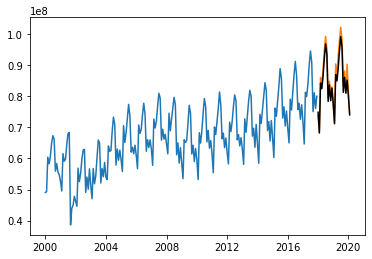

In [54]:
forecast = model_fit.forecast(steps=26)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

### MAE and RMSE

In [55]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

1794060.236820802


In [56]:
print(mean_squared_error(test, forecast, squared=False))

2199534.7867948688


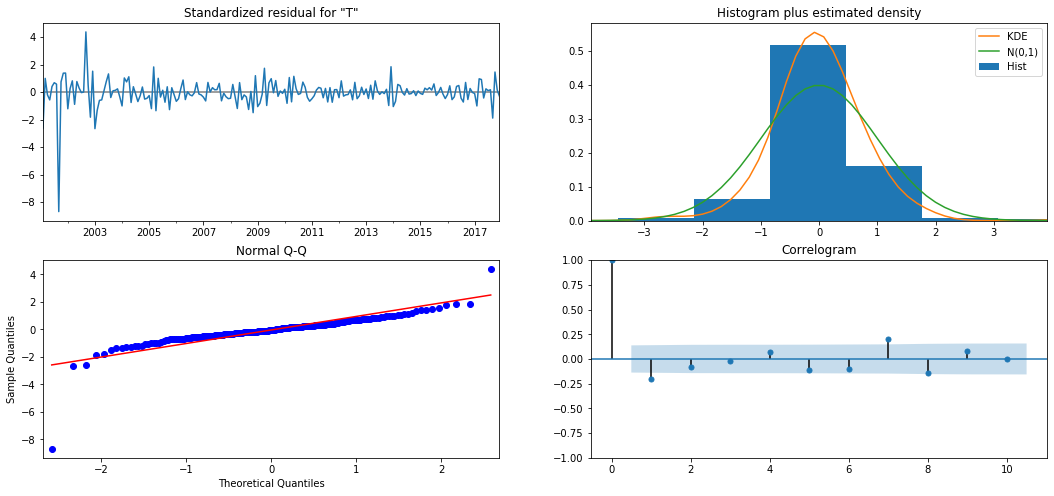

In [57]:
model_fit.plot_diagnostics(figsize=(18, 8))
plt.show()

### Holt winter ExponentialSmoothing model gave good RMSE value compared to other models